In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

First of all let's compute the gradient of a function that we know its gradient. \
$y=x^2$  \
$\frac{dy}{dx}=2x$

In [2]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2
  
grad = tape.gradient(y, x)
print(grad)

tf.Tensor(6.0, shape=(), dtype=float32)


the default behaviour of `GradientTape` is to record  all operations only after  **Trainable Variables**

In [3]:
x = tf.Variable(3.0, trainable=False)

with tf.GradientTape() as tape:
  y = x**2
grad = tape.gradient(y, x)
print(grad)

None


In [5]:
x = tf.constant(3.0)

with tf.GradientTape() as tape:
  y = x**2
grad = tape.gradient(y, x)
print(grad)
print(x)

None
tf.Tensor(3.0, shape=(), dtype=float32)


To record gradients with respect to a `tf.Tensor` and not trainable variables you need to call `GradientTape.watch(x)`:

In [6]:
x = tf.constant(3.0)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = x**2
grad = tape.gradient(y, x)
print(grad)

tf.Tensor(6.0, shape=(), dtype=float32)


Now let's compute the gradient of a wellknown function in machine learning: $sigmoid$

In [7]:
x = tf.linspace(-10, 10, 201)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)


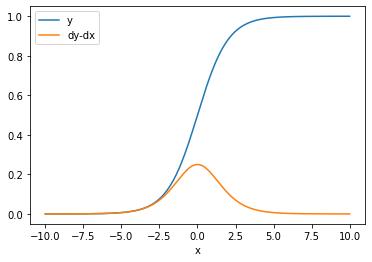

In [10]:
plt.plot(x, y, label="y")
plt.plot(x, dy_dx, label="dy-dx")
plt.legend()
_ = plt.xlabel("x")
plt.show()

The above examples uses scalars, but `tf.GradientTape` works as easily on any tensor:

In [11]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)

In [13]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

In [14]:
dl_dw

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.58298635,  1.4998004 ],
       [-1.1659727 ,  2.999601  ],
       [-1.7489591 ,  4.499401  ]], dtype=float32)>

In [15]:
dl_db

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.58298635,  1.4998004 ], dtype=float32)>

By default, the resources held by a `GradientTape` are released as soon as the `GradientTape.gradient` method is called. To compute multiple gradients over the same computation, create a gradient tape with `persistent=True`. This allows multiple calls to the gradient method as resources are released when the tape object is garbage collected. For example

In [16]:
x = tf.constant([1, 3.0])
with tf.GradientTape() as tape:
  tape.watch(x)
  y = x * x
  z = y * y

print(tape.gradient(z, x).numpy())  # [4.0, 108.0] (4 * x**3 at x = [1.0, 3.0])
print(tape.gradient(y, x).numpy())  # [2.0, 6.0] (2 * x at x = [1.0, 3.0])

[  4. 108.]


RuntimeError: ignored

In [17]:
x = tf.constant([1, 3.0])
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  y = x * x
  z = y * y

print(tape.gradient(z, x).numpy())  # [4.0, 108.0] (4 * x**3 at x = [1.0, 3.0])
print(tape.gradient(y, x).numpy())  # [2.0, 6.0] (2 * x at x = [1.0, 3.0])

[  4. 108.]
[2. 6.]


More information on Automatic Differentiation in TensorFlow: \
https://www.tensorflow.org/guide/autodiff \
https://www.tensorflow.org/guide/advanced_autodiff